<a href="https://colab.research.google.com/github/mcrespo133/cd-2023-mauricio-crespo/blob/main/Taller_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algoritmo k-means**


1.   Especificar el número *k* de *clusters* a asignar.
2.   Iniciar aleatoriamente *k* centroides.
3.   **Repetir**
> 4. **Espectativa:** Asignar cada punto a su centroide más cercano.
> 5. **Maximización:** Calcular el nuevo centroide (media) de clada *cluster*.
6.   **Hasta que** La posición del centroide no cambie.





In [ ]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 47.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Importar Datos
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
coords = df[['latitud', 'longitud']].to_numpy()
coords

array([[  7.07601118, -73.10250092],
       [  7.07949543, -73.10540009],
       [  7.09029007, -73.09100342],
       ...,
       [  7.09139061, -73.10326385],
       [  7.06108332, -73.09700012],
       [  7.06252098, -73.08044434]])

In [ ]:
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
df['x'], df['y'] = P(df['longitud'], df['latitud'])

In [ ]:
coords = df[['x', 'y']].to_numpy()
coords

array([[709584.02755874, 782579.28186627],
       [709262.12137799, 782963.35410304],
       [710847.92465398, 784163.82509702],
       ...,
       [709492.78278312, 784279.99626355],
       [710198.57491572, 780930.64855507],
       [712027.27741723, 781097.16920956]])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(coords)
scaled_features[:10]

array([[-0.9011081 , -0.15373823],
       [-1.2657243 ,  0.1672022 ],
       [ 0.53048091,  1.17034598],
       [ 0.54797186, -0.94205553],
       [-1.20678205, -0.99630952],
       [ 0.81227933, -0.39285677],
       [ 0.76254365,  0.30753062],
       [ 1.1657717 ,  0.59893147],
       [-0.87907268,  0.52306182],
       [-0.32381125, -0.94499682]])

# **Determinación de la cantidad adecuada de clusters**

**Método del codo**

In [ ]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

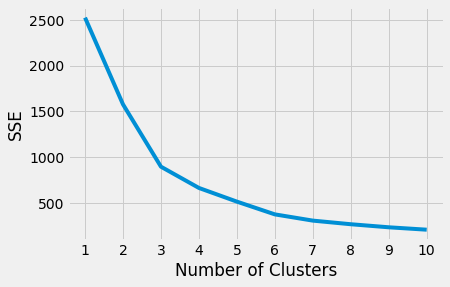

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

**Coeficiente de silueta**

In [ ]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluster
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

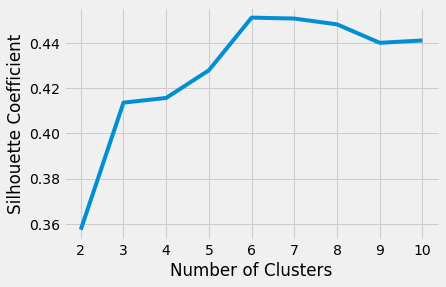

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Inicializado con 3 clusters
kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Cuadrado de errores estándar más bajo (SSE)
kmeans.inertia_

897.8844012095306

In [ ]:
# Posición final de los centroides
kmeans.cluster_centers_

array([[ 0.93814301, -0.94141766],
       [-0.98530569, -0.32924636],
       [ 0.2338701 ,  1.03491211]])

In [ ]:
# Número de iteraciones requeridas
kmeans.n_iter_

9

In [ ]:
kmeans.labels_

array([1, 1, 2, ..., 2, 0, 0], dtype=int32)

In [ ]:
#Inicializado con 6
kmeans = KMeans(
  init="random",
  n_clusters=6,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [ ]:
# Cuadrado de errores estándar más bajo (SSE)
kmeans.inertia_

377.7496116905413

In [ ]:
# Posición final de los centroides
centroids = kmeans.cluster_centers_

In [ ]:
# Número de iteraciones requeridas
kmeans.n_iter_

13

In [ ]:
kmeans.labels_

array([2, 2, 3, ..., 2, 0, 4], dtype=int32)

Conclusión: A pesar de que el método del codo puede mostrar visualmente y a través del método KneeLocator que el número optimo de clusters es 3, probamos que 6 es el mejor número de clusters para obtener el SSE más bajo, tal como lo indica el método de la Silueta.

In [ ]:
# Por último se transforma de vuelta los centroides a coordenadas UTM
coordsCentroids = scaler.inverse_transform(centroids)
coordsCentroids

array([[710078.31327563, 781530.69729248],
       [708801.56689714, 781950.57827712],
       [709639.42320305, 783344.64317778],
       [710676.53104374, 784242.82757894],
       [711581.691536  , 781263.49767167],
       [711154.98046515, 782893.6030612 ]])